In [2]:
%load_ext autoreload
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
# from matplotlib.patches import Ellipse
# import subprocess
# from ipywidgets import interact
from mpl_toolkits import mplot3d
%matplotlib inline

In [4]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

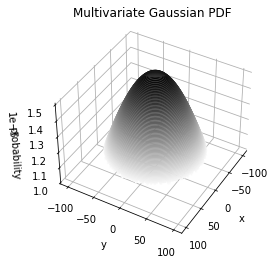

In [7]:
# Our 2-dimensional distribution will be over variables X and Y
N = 80
X = np.linspace(-100., 100, N)
Y = np.linspace(-100., 100, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 0.])
XVar = 10000.
YVar = 10000.
Sigma = np.array([[ XVar , 0], [0, YVar]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos.

    pos is an array constructed by packing the meshed arrays of variables
    x_1, x_2, x_3, ..., x_k into its _last_ dimension.

    """

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)

Z[Z<1.1e-5]= np.nan

ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 90, cmap='binary')
ax.set_zlim3d([1.0e-5,1.5e-5])

ax.view_init(40, 30)

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
# ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
# ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

ax.set_title('Multivariate Gaussian PDF')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('probability')

# plt.savefig('mGaussian.pdf', bbox_inches='tight', dpi=300)
plt.show()


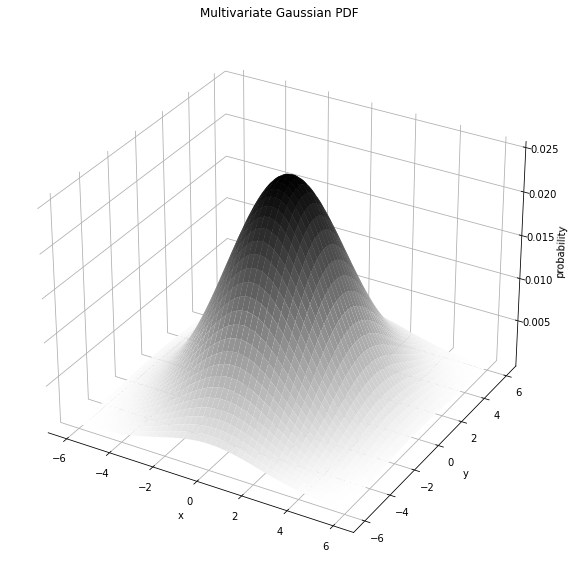

In [178]:
from scipy.stats import multivariate_normal

X = np.linspace(-6,6,100)

Y = np.linspace(-6,6,100)

X, Y = np.meshgrid(X,Y)

X_mean = 0; Y_mean = 0

X_var = 5; Y_var = 8

pos = np.empty(X.shape+(2,))

pos[:,:,0]=X

pos[:,:,1]=Y

rv = multivariate_normal([X_mean, Y_mean],[[X_var, 0], [0, Y_var]])

plt.rcParams["figure.figsize"] = (10,10)

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, rv.pdf(pos), cmap="binary")
# ax.contour3D(X, Y, rv.pdf(pos), 90, cmap="binary")

ax.set_title('Multivariate Gaussian PDF')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('probability')
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# ax.view_init(30, 30)
# plt.savefig('mGaussian.pdf', bbox_inches='tight', dpi=300)
plt.show()

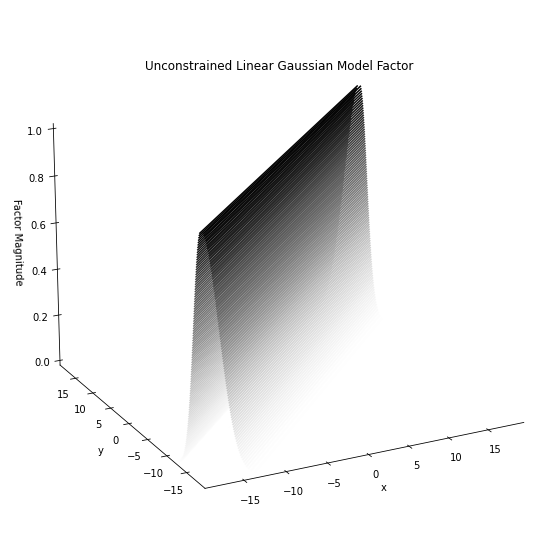

In [175]:
XVar = 2.

def f(x, y):
    return np.exp(-np.power(x - y, 2.) / (2 * np.power(XVar, 2.)))

r = 20

x = np.linspace(-r, r, 300)
y = np.linspace(-r, r, 300)

X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
for i in range(len(X)):
    for j in range(len(Y)):
        Z[i,j] = f(X[i,j],Y[i,j])

plt.rcParams["figure.figsize"] = (10,10)

fig = plt.figure()
ax = plt.axes(projection='3d')
# ax.plot_surface(X, Y, Z, cmap='binary')
ax.contour3D(X, Y, Z, 120, cmap='Greys')
# ax.plot_wireframe(X, Y, Z, color='black', rstride=10, cstride=7)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.set_title('Unconstrained Linear Gaussian Model Factor', y=0.95)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Factor Magnitude')
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

blim = r*0.94
ax.set_xlim(-blim,blim)
ax.set_ylim(-blim,blim)
ax.view_init(20, -117)

plt.savefig('infVol.pdf', bbox_inches='tight', dpi=300)

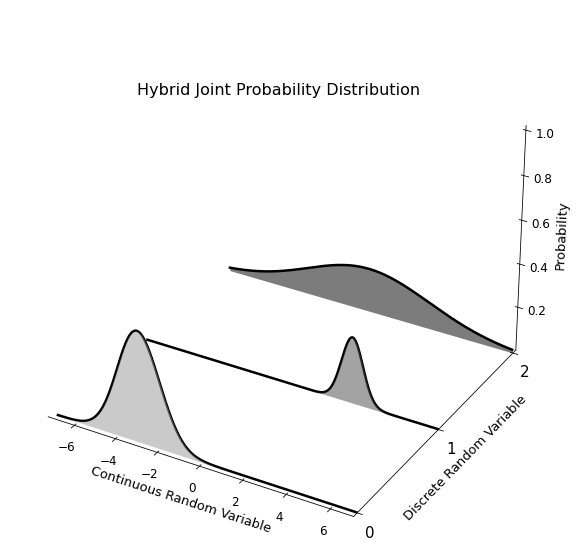

In [91]:
X = np.linspace(-7,7,500)

Y0 = np.linspace(0,0,500)
Z0 = 0.5*gaussian(X, -3, 1)

Y1 = np.linspace(1,1,500)
Z1 = 0.3*gaussian(X, 3, 0.5)

Y2 = np.linspace(2,2,500)
Z2 = 0.2*gaussian(X, 0, 3)

plt.rcParams["figure.figsize"] = (10,10)

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.add_collection3d(plt.fill_between(X,Z1-0.001,0-0.001, color=[0.3,0.3,0.3], alpha=0.3, linewidth=0), zs=1, zdir='y')
ax.add_collection3d(plt.fill_between(X,Z2-0.001,0-0.001, color=[0.0,0.0,0.0], alpha=0.3, linewidth=0), zs=2, zdir='y')
ax.add_collection3d(plt.fill_between(X,Z0-0.002,0-0.002, color=[0.6,0.6,0.6], alpha=0.3, linewidth=0), zs=0, zdir='y')


ax.plot3D(X, Y2, Z2, color=[0,0,0], linewidth=2.5)
ax.plot3D(X, Y1, Z1, color=[0,0,0], linewidth=2.5)
ax.plot3D(X, Y0, Z0, color=[0,0,0], linewidth=2.5)

ax.set_xlim3d([-7,6.75])
ax.set_ylim3d([0,2])
ax.set_zlim3d([0.019,1])

ax.set_yticks([0,1,2])
for t in ax.yaxis.get_major_ticks(): t.label.set_fontsize(15)
for t in ax.xaxis.get_major_ticks(): t.label.set_fontsize(12)
for t in ax.zaxis.get_major_ticks(): t.label.set_fontsize(12)

ax.set_title('Hybrid Joint Probability Distribution', y=0.9, fontsize=16)
ax.set_xlabel('Continuous Random Variable', fontsize=13)
ax.set_ylabel('Discrete Random Variable', fontsize=13)
ax.set_zlabel('Probability', fontsize=13)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

# ax.view_init(30, 30)
plt.savefig('hybridDensity.pdf', bbox_inches='tight', dpi=400)
plt.show()